In [30]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10 #Загружаем базу cifar10

from tensorflow.keras.models import Sequential #Сеть прямого распространения
#Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator # работа с изображениями
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils #Используем дял to_categoricall
from tensorflow.keras.preprocessing import image #Для отрисовки изображений
from google.colab import files #Для загрузки своей картинки
import numpy as np #Библиотека работы с массивами
import matplotlib.pyplot as plt #Для отрисовки графиков
from PIL import Image #Для отрисовки изображений
import random #Для генерации случайных чисел
import math # Для округления
import os #Для работы с файлами
# подключем диск
from google.colab import drive
from sklearn.model_selection import train_test_split


%matplotlib inline

In [4]:
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [5]:

x_train10 = x_train10 / 255.0
x_test10 = x_test10 / 255.0
y_train10 = to_categorical(y_train10, 10)
y_test10 = to_categorical(y_test10, 10)

In [6]:

validation_split = 0.2
split = int((1 - validation_split) * len(x_train10))

x_train, x_val = x_train10[:split], x_train10[split:]
y_train, y_val = y_train10[:split], y_train10[split:]


In [7]:

model = keras.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='swish', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='swish', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))


model.add(layers.Conv2D(64, (3, 3), padding='same', activation='swish'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='swish'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))


model.add(layers.Conv2D(128, (3, 3), padding='same', activation='swish'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))


In [8]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

In [10]:
datagen.fit(x_train)

In [11]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=30,
                    validation_data=(x_val, y_val))

Epoch 1/30
1250/1250 [==============================] - 312s 247ms/step - loss: 1.8576 - accuracy: 0.3199 - val_loss: 1.3775 - val_accuracy: 0.4933
Epoch 2/30
1250/1250 [==============================] - 312s 249ms/step - loss: 1.4422 - accuracy: 0.4851 - val_loss: 1.3783 - val_accuracy: 0.5298
Epoch 3/30
1250/1250 [==============================] - 311s 249ms/step - loss: 1.2344 - accuracy: 0.5731 - val_loss: 1.3849 - val_accuracy: 0.5290
Epoch 4/30
1250/1250 [==============================] - 309s 247ms/step - loss: 1.1080 - accuracy: 0.6219 - val_loss: 1.0055 - val_accuracy: 0.6694
Epoch 5/30
1250/1250 [==============================] - 310s 248ms/step - loss: 1.0279 - accuracy: 0.6515 - val_loss: 1.0245 - val_accuracy: 0.6611
Epoch 6/30
1250/1250 [==============================] - 308s 246ms/step - loss: 0.9718 - accuracy: 0.6713 - val_loss: 1.2129 - val_accuracy: 0.6336
Epoch 7/30
1250/1250 [==============================] - 306s 244ms/step - loss: 0.9240 - accuracy: 0.6885 - val_

In [18]:

test_loss, test_acc = model.evaluate(x_test10, y_test10)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 20s 64ms/step - loss: 0.6451 - accuracy: 0.7947
Test accuracy: 79.47%


In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

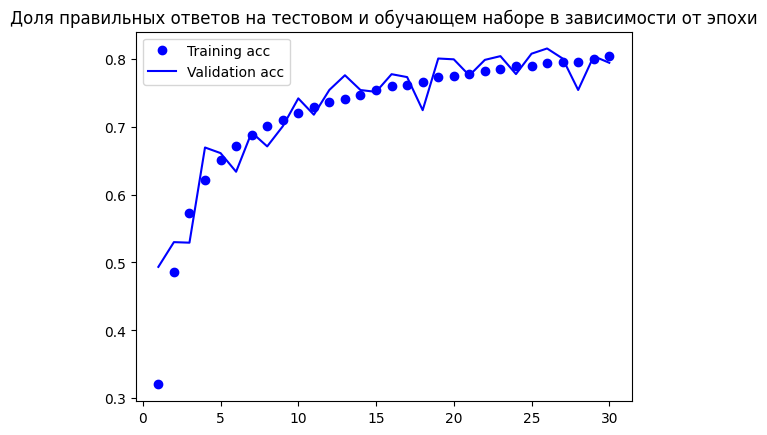

In [23]:

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Доля правильных ответов на тестовом и обучающем наборе в зависимости от эпохи')
plt.legend()

plt.show()

In [25]:
!unzip "/content/Автомобили.zip"

Archive:  /content/Автомобили.zip
   creating: Автомобили/
   creating: Автомобили/train/
   creating: Автомобили/train/Ferrari/
  inflating: Автомобили/train/Ferrari/car_Ferrari__0.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__10.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__100.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1000.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1002.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1003.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1004.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1005.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1006.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1007.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1009.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__101.png  
  inflating: Автомобили/train/Ferrari/car_Ferrari__1010.png  
  inflating: 

In [54]:
import tensorflow as tf
tf.keras.backend.clear_session()


In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'Автомобили/train'
val_dir = 'Автомобили/val'

batch_size = 32


image_size = (192, 108)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.


In [63]:
model = keras.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(3, activation='softmax'))


In [64]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [65]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = val_generator,
    validation_steps = val_generator.samples // batch_size,
    epochs=20,
    verbose=1
)

<ipython-input-65-82ef2f6fcafa>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
85/85 [==============================] - 23s 223ms/step - loss: 1.5263 - accuracy: 0.3685 - val_loss: 1.1189 - val_accuracy: 0.3393
Epoch 2/20
85/85 [==============================] - 19s 222ms/step - loss: 1.1597 - accuracy: 0.3954 - val_loss: 1.1181 - val_accuracy: 0.3839
Epoch 3/20
85/85 [==============================] - 19s 221ms/step - loss: 1.0762 - accuracy: 0.4434 - val_loss: 1.0955 - val_accuracy: 0.4301
Epoch 4/20
85/85 [==============================] - 18s 209ms/step - loss: 1.0399 - accuracy: 0.4522 - val_loss: 1.0572 - val_accuracy: 0.4479
Epoch 5/20
85/85 [==============================] - 19s 227ms/step - loss: 0.9949 - accuracy: 0.4994 - val_loss: 1.0247 - val_accuracy: 0.4985
Epoch 6/20
85/85 [==============================] - 18s 209ms/step - loss: 0.9653 - accuracy: 0.5352 - val_loss: 0.9910 - val_accuracy: 0.5402
Epoch 7/20
85/85 [==============================] - 22s 257ms/step - loss: 0.9621 - accuracy: 0.5286 - val_loss: 0.9680 - val_accuracy: 0.5402

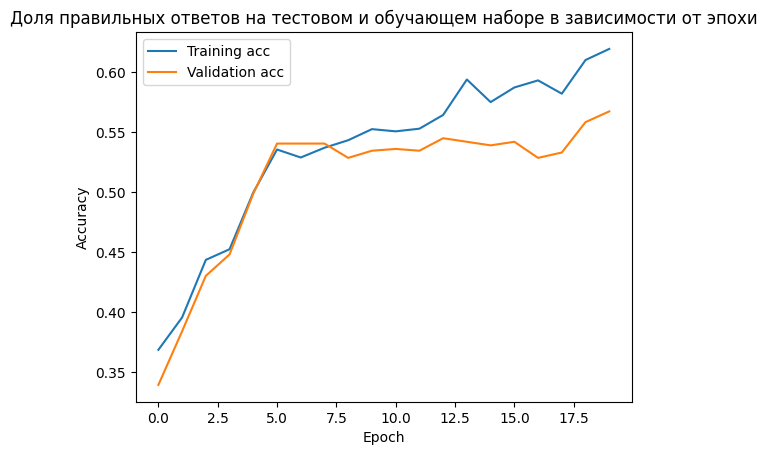

In [69]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Доля правильных ответов на тестовом и обучающем наборе в зависимости от эпохи')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training acc', 'Validation acc'], loc='upper left')
plt.show()
